# This is my data project
## this is smaller title
### this is even smaller
this is text

# Data Audit
Why was it collected?: Netflix
Who paid for it?: Netflix
Where did you get it from?: Netflix

`imports`, I've seen this before!

In [54]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [55]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [56]:
plt.rcParams["figure.figsize"] = (10, 5)


In [57]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


The following checks to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.

In [58]:
if os.path.isfile("all-weeks-countries.csv"):
    filepath = "all-weeks-countries.csv"
    print("loading from file")
else:
    filepath = "https://www.kaggle.com/datasets/dhruvildave/netflix-top-10-tv-shows-and-films?resource=download&select=all-weeks-countries.csv"
    print("loading from the internet")

netflix_data = pd.read_csv(filepath)
print("done")


loading from file
done


In [72]:
netflix_data.iloc[4]

country_name                                Argentina
country_iso2                                       AR
week                              2022-08-21 00:00:00
category                                        Films
weekly_rank                                         5
show_title                    The Angry Birds Movie 2
season_title                                      NaN
cumulative_weeks_in_top_10                          1
Name: 4, dtype: object

In [59]:
netflix_data.head() #gives the top 5 rows

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-08-21,Films,1,Look Both Ways,NaN,1
1,Argentina,AR,2022-08-21,Films,2,Day Shift,NaN,2
2,Argentina,AR,2022-08-21,Films,3,Bank Robbers: The Last Great Heist,NaN,2
3,Argentina,AR,2022-08-21,Films,4,The Next 365 Days,NaN,1
4,Argentina,AR,2022-08-21,Films,5,The Angry Birds Movie 2,NaN,1


The .value_counts() will create a series, where (using below as an example), index is the show name and value is the numerical value assigned ot the show name

In [60]:
count_of_shows=netflix_data["show_title"].value_counts() 
count_of_shows

show_title
Stranger Things                           3119
The Good Doctor                           1759
Money Heist                               1642
Manifest                                  1482
Squid Game                                1202
                                          ... 
Zero Dark Thirty                             1
Son of the Mask                              1
Oprah + Viola: A Netflix Special Event       1
No Good Deed                                 1
Glitch                                       1
Name: count, Length: 3459, dtype: int64

<Axes: xlabel='show_title'>

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49800 (\N{HANGUL SYLLABLE SYU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47112 

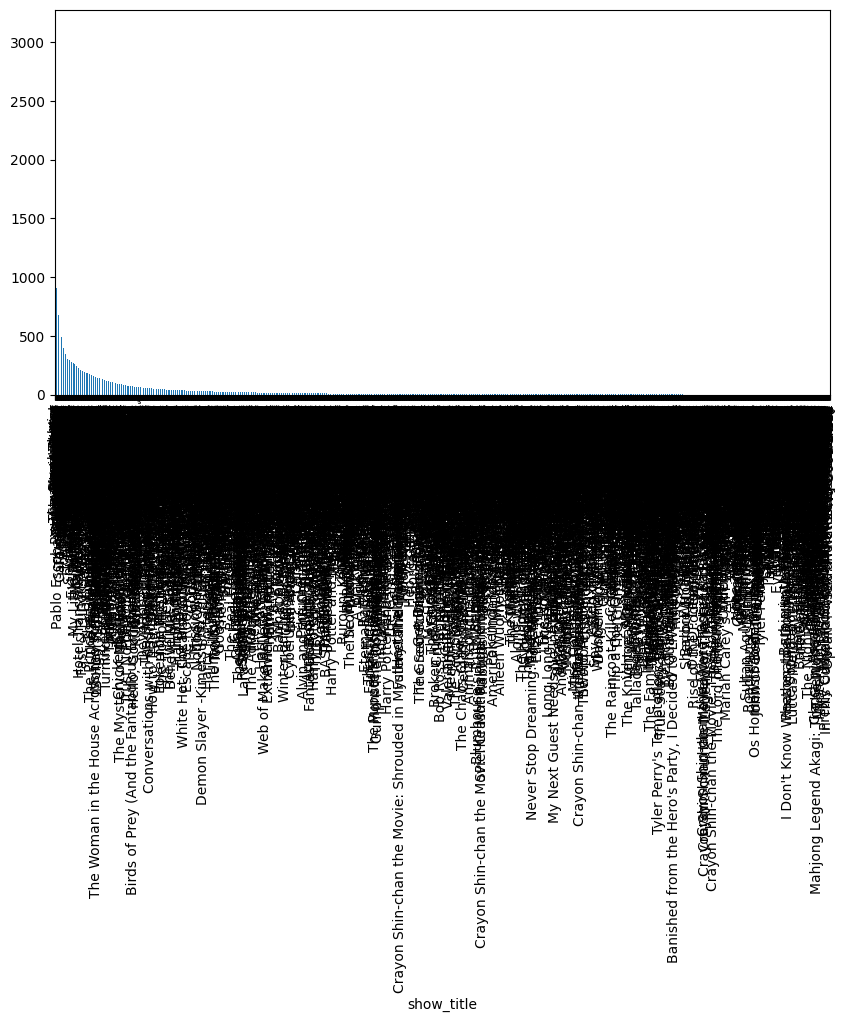

In [61]:
count_of_shows.plot(kind="bar")

the below only plots the tv shows that show up for a specific number of times

<Axes: ylabel='show_title'>

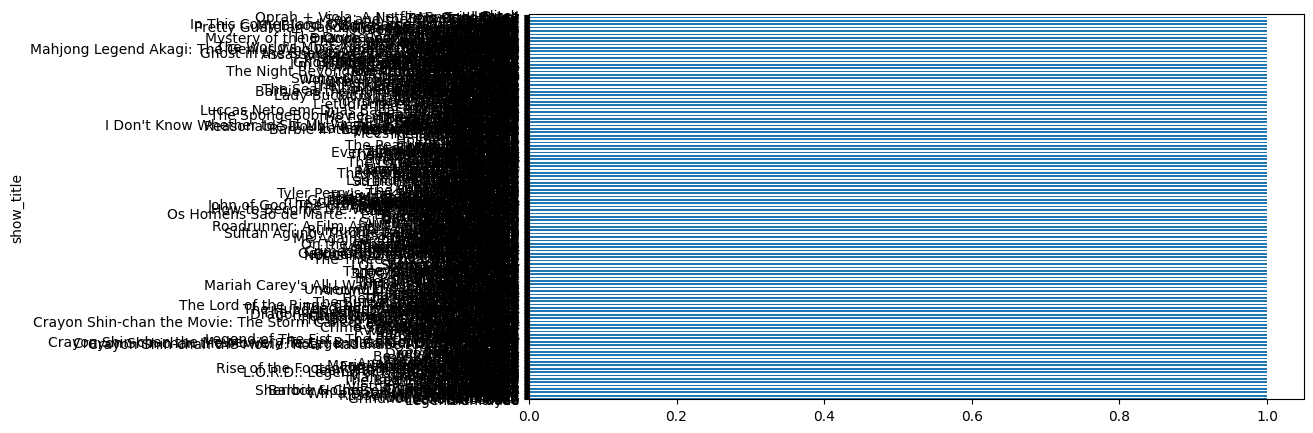

In [62]:
count_of_shows[count_of_shows ==1].plot(kind="barh")

the below code creates the same horizontal bar graph

<BarContainer object of 656 artists>

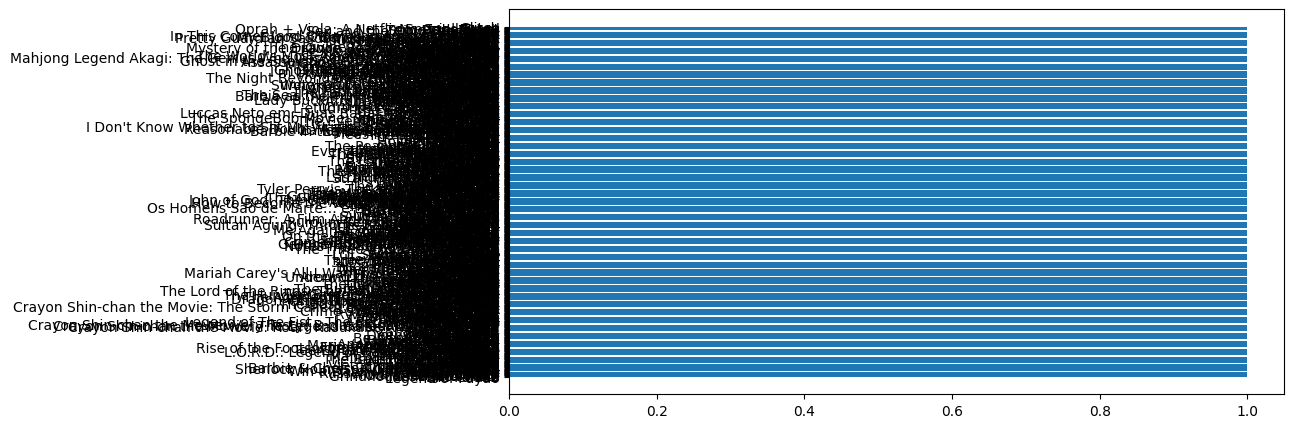

In [63]:
plt.barh(count_of_shows[count_of_shows==1].index,count_of_shows[count_of_shows==1].values)

The below kinda parses the dates so that the code recognises the date in the column "week"

In [64]:
netflix_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["week"],
)
netflix_data.head(2)


/var/folders/m6/9l2c43w54_dcl4z2zjrmxh940000gn/T/ipykernel_21455/3425564230.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  netflix_data = pd.read_csv(


,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-08-21,Films,1,Look Both Ways,NaN,1
1,Argentina,AR,2022-08-21,Films,2,Day Shift,NaN,2


Then it finds the max and min date

In [65]:
first_date = netflix_data.week.min()
last_date = netflix_data.week.max()
f"range is: {first_date} to {last_date}"


'range is: 2021-07-04 00:00:00 to 2022-08-21 00:00:00'

This makes it much more readable 

In [67]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(first_date, date_format_pattern)
latest_date = datetime.strftime(last_date, date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

'range is: July, 2021 to August, 2022'

The below(first line) shows how to filter the data to make a graph

<BarContainer object of 40 artists>

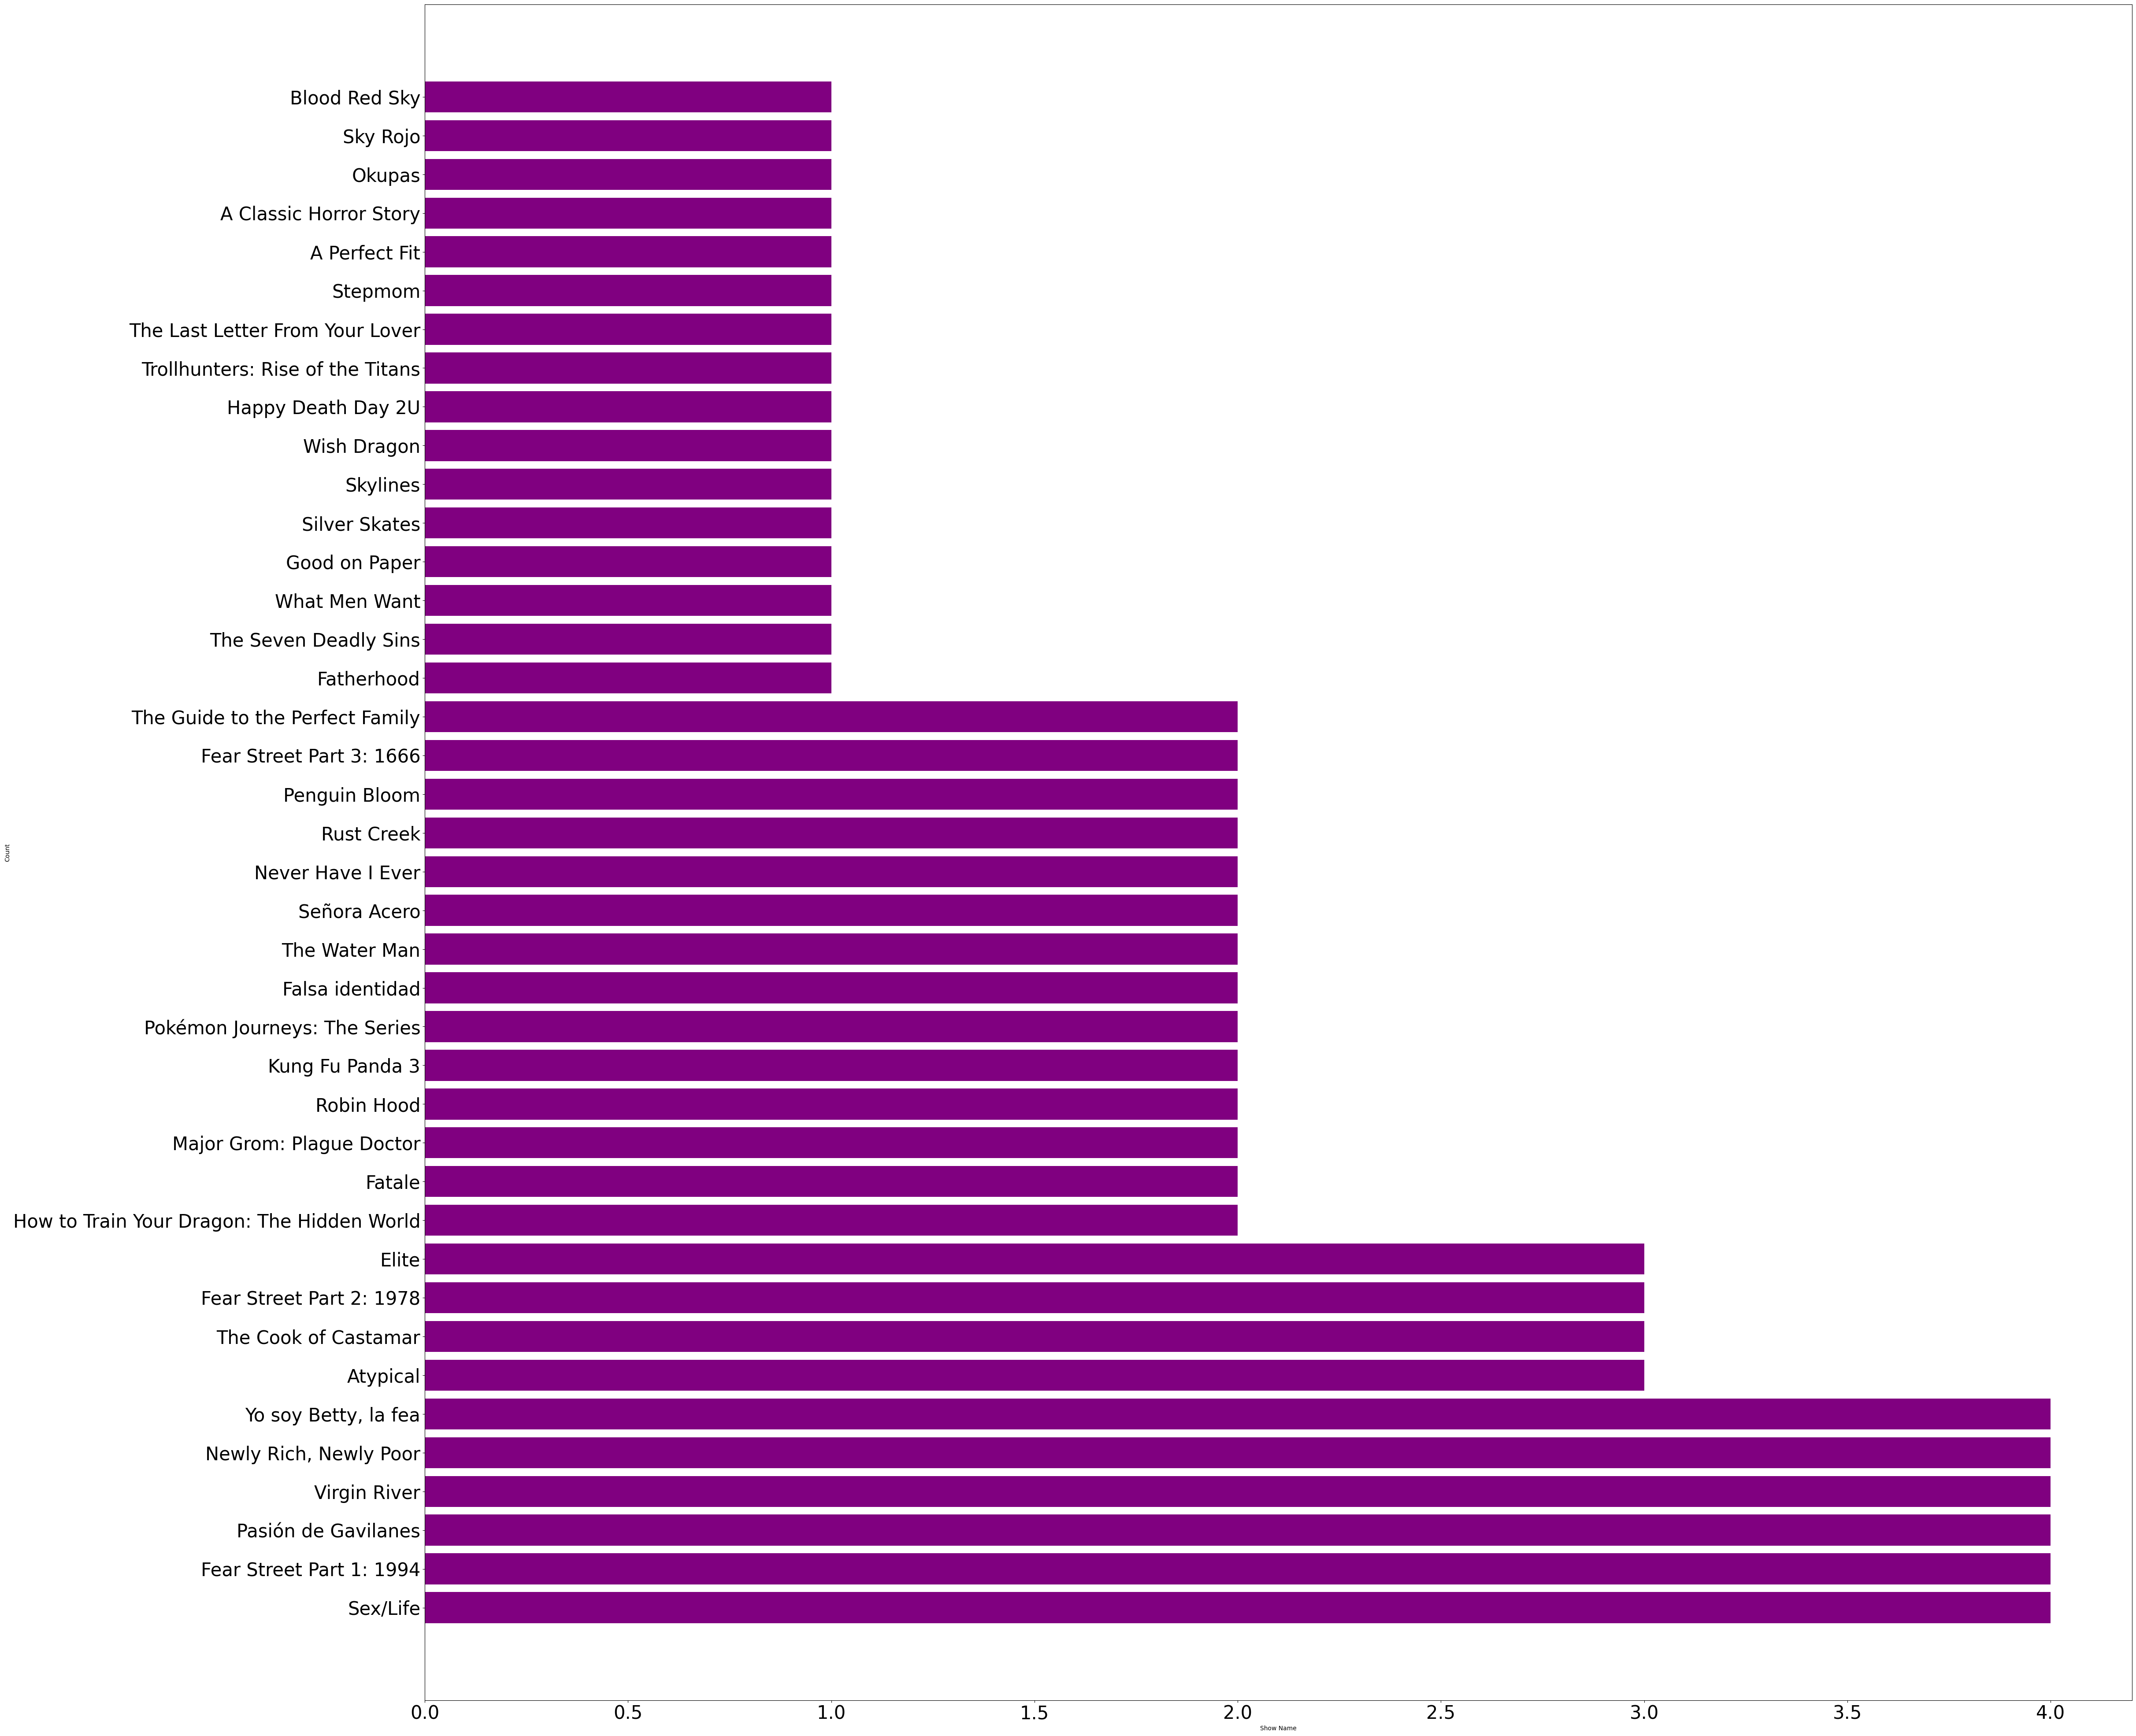

In [68]:
filtered_data = netflix_data[(netflix_data['week'] <="2021-07-30") & (netflix_data['week'] >="2021-07-04")&(netflix_data['country_name']=="Argentina")]
show_counts = filtered_data['show_title'].value_counts() 
plt.figure(figsize=(50, 50))
plt.xlabel('Show Name')
plt.ylabel('Count')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)  
plt.barh(show_counts.index, show_counts.values, color='purple')

<BarContainer object of 41 artists>

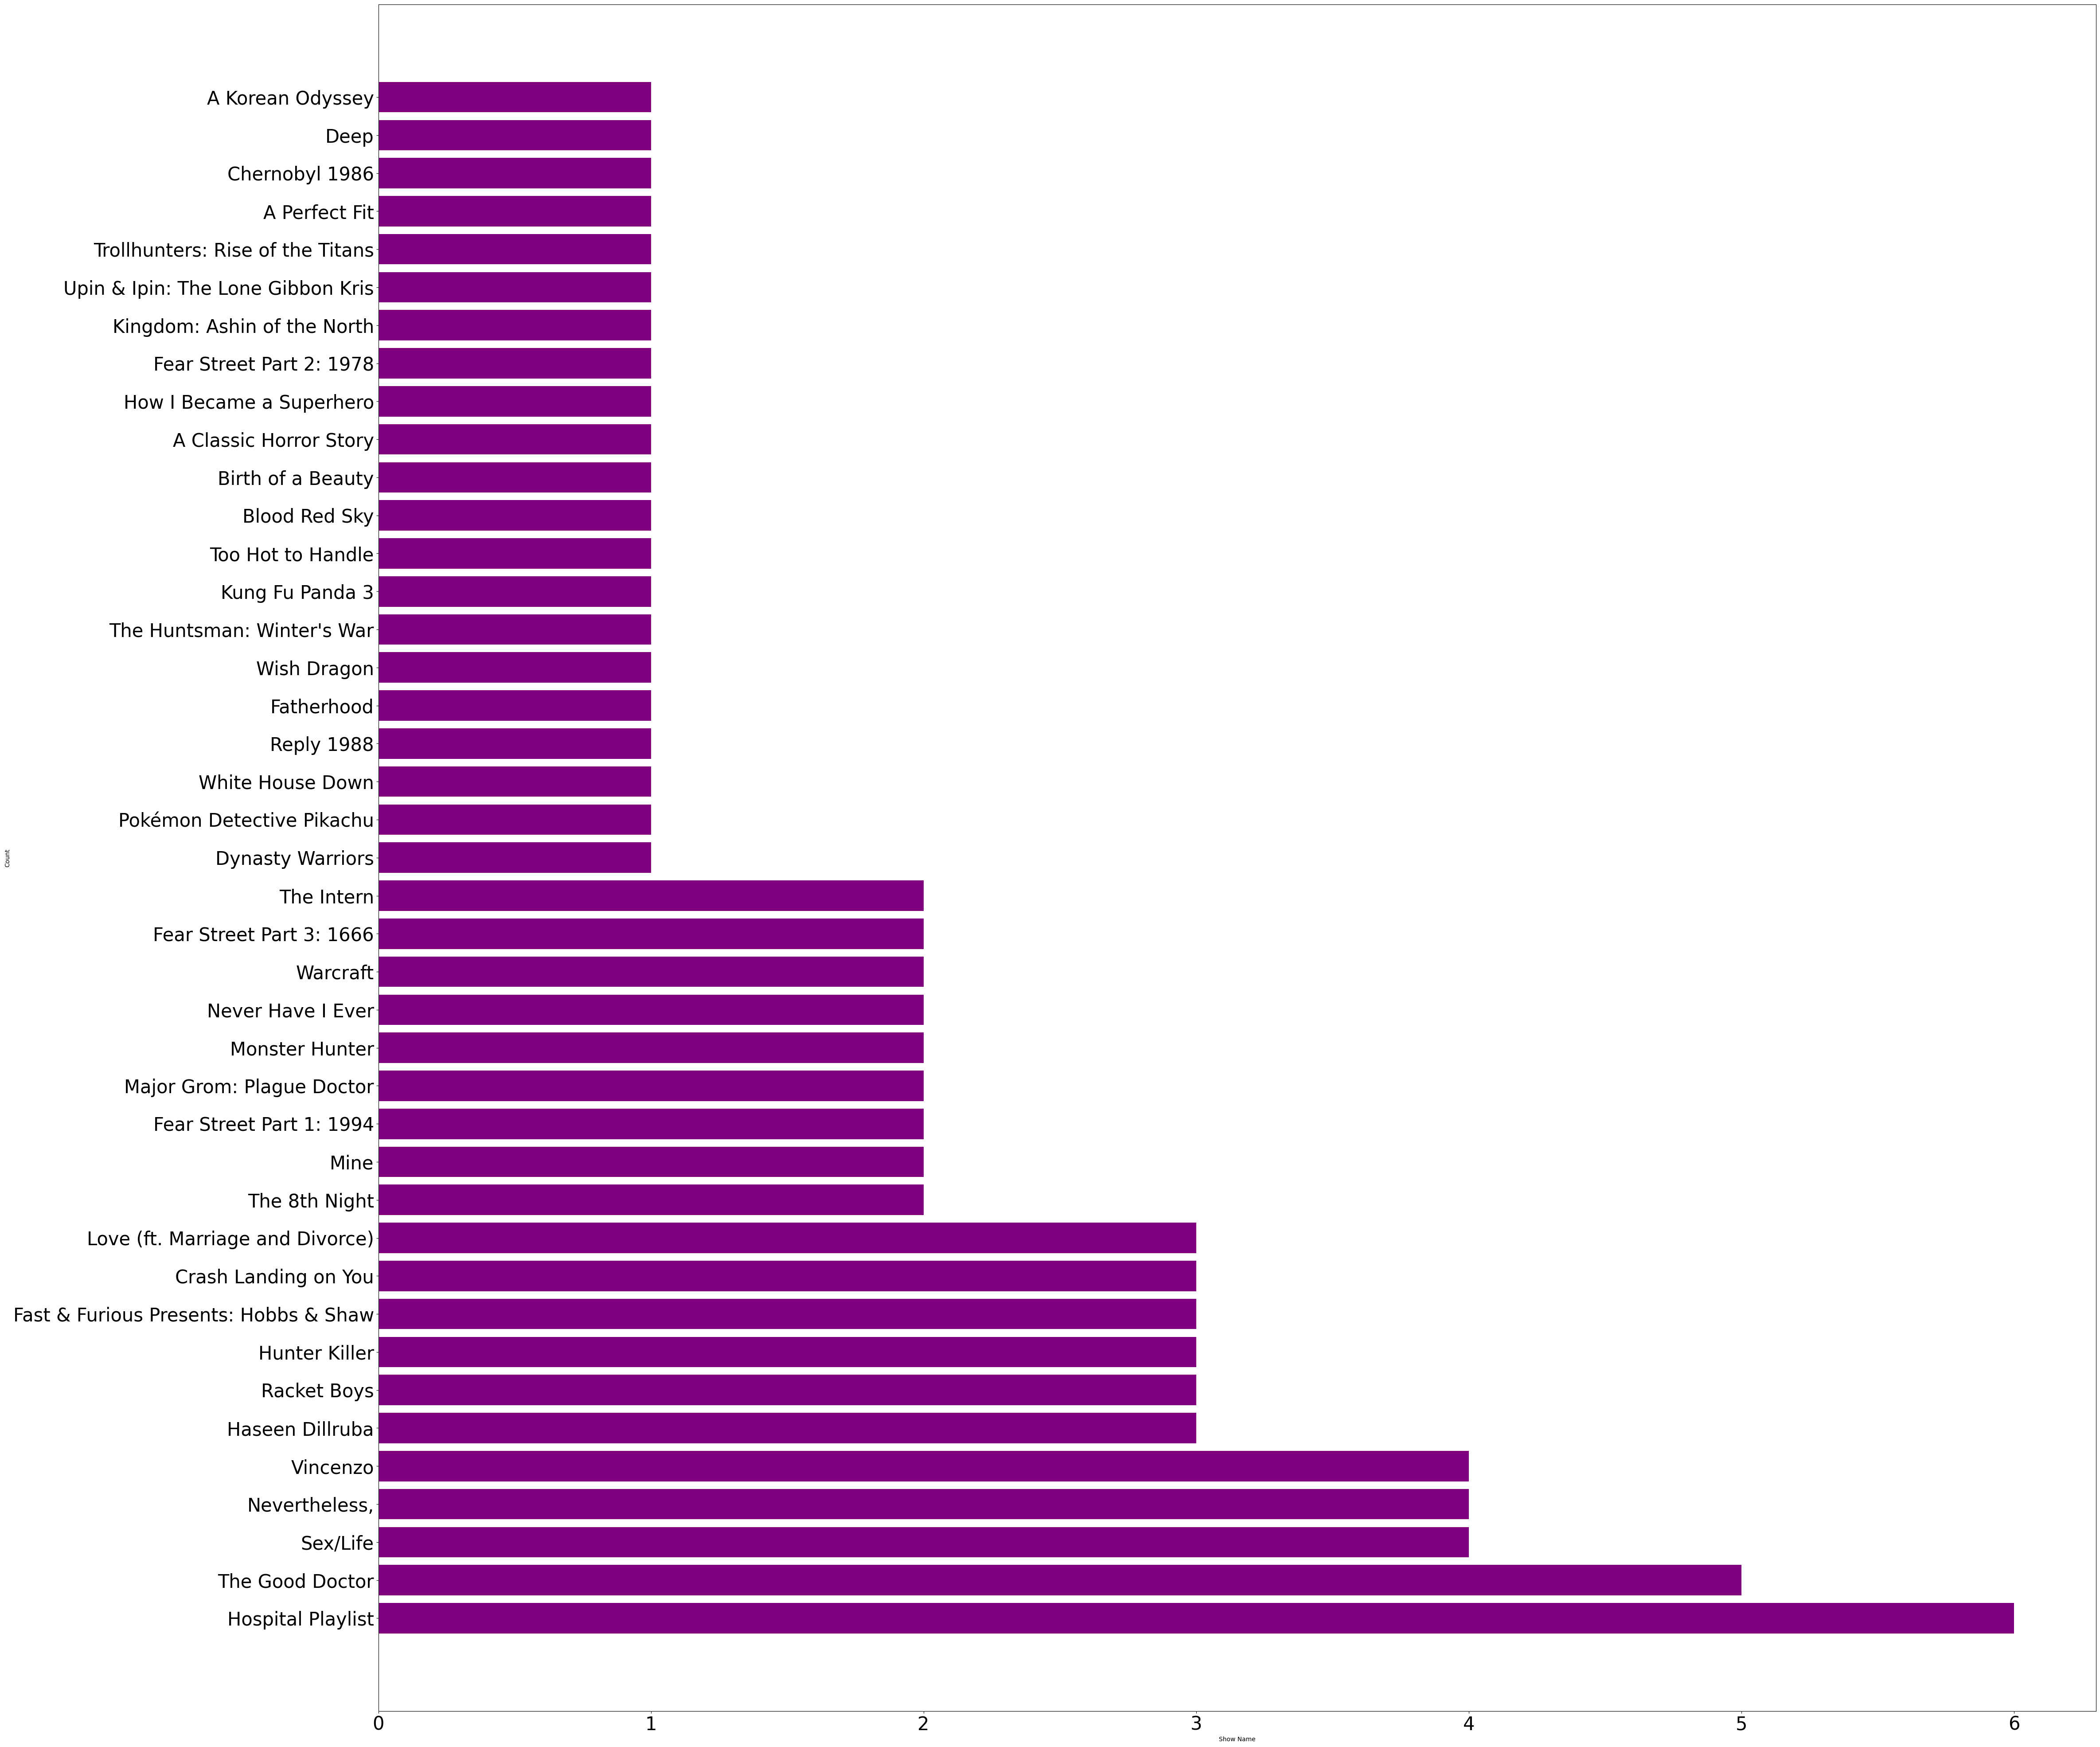

In [69]:
filtered_data = netflix_data[(netflix_data['week'] <="2021-07-30") & (netflix_data['week'] >="2021-07-04")&(netflix_data['country_name']=="Malaysia")]
show_counts = filtered_data['show_title'].value_counts() 
plt.figure(figsize=(50, 50))
plt.xlabel('Show Name')
plt.ylabel('Count')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)  
plt.barh(show_counts.index, show_counts.values, color='purple')

# GROUPBY

In [103]:
for name, df in netflix_data.groupby("country_name"):
#netflix_data.groupby("country_name") creates a grouped object where netflix_data is split into groups based on unique values in the "country_name" column.
#The for name, df in ... part iterates over each group produced by groupby("country_name").
# name represents the unique value from the "country_name" column that defines the current group.
# df represents only the rows where "country_name" matches name.
    popular=df[df.cumulative_weeks_in_top_10>45] #filters the dataframe to select rows where the "cumulative_weeks_in_top_10" column has values greater than 45.
    if popular.shape[0]: #shape[0] gives the number of rows, in this context it checks if popular has any rows
        titles = popular.show_title.unique() #Retrieves unique values from the 'show_title' column of the popular DataFrame.
        print(name, df.shape, titles, len(titles))
        #df.shape: Shape of the original DataFrame subset (df), which includes the number of rows and columns.
        #len(titles): Number of unique show titles in popular
        #print(popular[["show_title","cumulative_weeks_in_top_10"]])
        

Argentina (1200, 8) ['Pasión de Gavilanes'] 1
Bolivia (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Brazil (1200, 8) ['Chiquititas'] 1
Chile (1200, 8) ['Pasión de Gavilanes' 'Yo soy Betty, la fea'] 2
Colombia (1200, 8) ['Pablo Escobar, el patrón del mal' 'Yo soy Betty, la fea'] 2
Costa Rica (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Dominican Republic (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'] 2
Ecuador (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
El Salvador (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Guatemala (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Honduras (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Japan (1200, 8) ['Itaewon Class' 'Crash Landing on You'

In [110]:
for week, row in netflix_data.groupby("week"):
    popular=row[row.cumulative_weeks_in_top_10>10]
    print(week, popular.show_title.unique())

2021-07-04 00:00:00 []
2021-07-11 00:00:00 []
2021-07-18 00:00:00 []
2021-07-25 00:00:00 []
2021-08-01 00:00:00 []
2021-08-08 00:00:00 []
2021-08-15 00:00:00 []
2021-08-22 00:00:00 []
2021-08-29 00:00:00 []
2021-09-05 00:00:00 []
2021-09-12 00:00:00 ['Pasión de Gavilanes' 'Haseen Dillruba' 'Yo soy Betty, la fea'
 'Newly Rich, Newly Poor' 'Señora Acero' 'Chiquititas'
 'As Aventuras de Poliana' 'Pablo Escobar, el patrón del mal'
 'Hospital Playlist' 'Money Heist' 'Vincenzo' 'Tokyo Revengers'
 'Crash Landing on You' 'Nevertheless,' 'Itaewon Class' 'Falsa identidad'
 'Resurrection: Ertugrul' 'Reply 1988']
2021-09-19 00:00:00 ['Pasión de Gavilanes' 'Yo soy Betty, la fea' 'Haseen Dillruba'
 'Money Heist' 'Newly Rich, Newly Poor' 'Señora Acero' 'Carrossel'
 'Chiquititas' 'As Aventuras de Poliana'
 'Pablo Escobar, el patrón del mal' 'Hospital Playlist' 'Tokyo Revengers'
 'Crash Landing on You' 'Itaewon Class' 'Nevertheless,' 'Falsa identidad'
 'Resurrection: Ertugrul' 'Lucifer' 'Vincenzo' 'Rep